In [5]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
 
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

In [6]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/ML%20Pemula/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Berdasarkan hasil statistik deskriptif yang ditampilkan oleh df.describe(), kita dapat melihat beberapa informasi penting mengenai kolom-kolom numerik dalam dataset.

CustomerID

Ini terdiri dari 200 data unik dengan nilai rata-rata 100.5.

ID pelanggan bervariasi dari 1 hingga 200.

Age (Usia)

Usia pelanggan berkisar antara 18 hingga 70 tahun dengan rata-rata 38.85 tahun.

Sebagian besar pelanggan berada pada rentang usia 28.75 hingga 49 tahun (kuartil ke-1 hingga ke-3).

Annual Income (k$) (Pendapatan Tahunan)

Pendapatan tahunan pelanggan bervariasi antara 15 hingga 137 ribu dolar dengan rata-rata 60.56 ribu dolar.

Sebagian besar pelanggan memiliki pendapatan tahunan antara 41.5 hingga 78 ribu dolar.

Spending Score (1–100) (Skor Pengeluaran)

Skor pengeluaran pelanggan bervariasi dari 1 hingga 99 dengan rata-rata skor pengeluaran sebesar 50.2.

Sebagian besar pelanggan memiliki skor pengeluaran antara 34.75 hingga 73.

Statistik ini memberikan gambaran awal tentang distribusi dan variasi data pada dataset, yang sangat penting untuk analisis lebih lanjut, terutama dalam mengidentifikasi cluster pelanggan berdasarkan karakteristik, seperti usia, pendapatan, serta perilaku belanja.



Exploratory Data Analysis
Tahap ketiga yang paling penting dalam analisis data adalah exploratory data analysis (EDA). Pada tahap ini, kita melakukan eksplorasi mendalam terhadap dataset untuk memahami pola, hubungan, dan anomali yang ada. EDA memungkinkan kita untuk mendapatkan wawasan awal yang penting untuk analisis lebih lanjut dan mempersiapkan data sebelum membangun model. 

Aktivitas utama dalam EDA mencakup visualisasi data melalui grafik dan plot untuk melihat distribusi serta hubungan antar fitur, analisis korelasi dalam mengidentifikasi hubungan antara fitur-fitur numerik, serta deteksi anomali dan outlier yang dapat memengaruhi model.

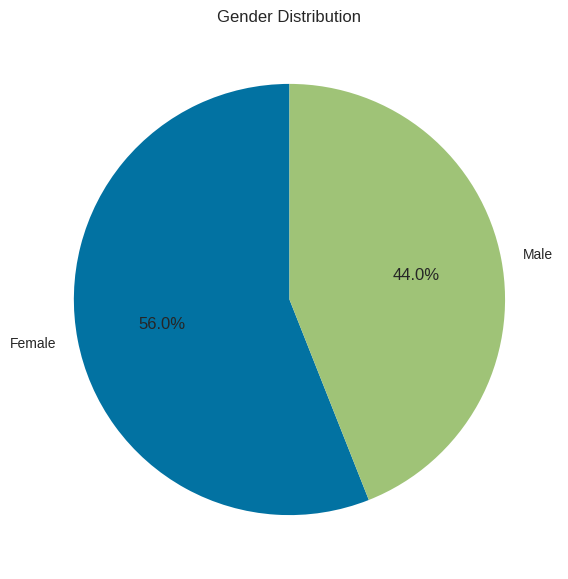

In [9]:
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

Dari pie chart yang ditampilkan, kita dapat ketahui bahwa persentase perempuan lebih besar dibandingkan laki-laki dengan proporsi sebesar 56% untuk perempuan dan 44% untuk laki-laki.

Untuk menganalisis distribusi usia pelanggan, kita mengelompokkan usia ke dalam beberapa kategori dan menghitung jumlah pelanggan pada setiap kategori. Usia dibagi menjadi lima kategori: 18–25, 26–35, 36–45, 46–55, dan 55 ke atas. Setelah menghitung jumlah pelanggan pada setiap kategori, data tersebut digunakan untuk membuat diagram batang (bar chart) yang menunjukkan distribusi usia pelanggan.

Ya, proses ini disebut sebagai binning. Ini adalah teknik untuk mengelompokkan nilai-nilai numerik ke dalam interval atau kategori yang disebut bins. Dalam kasus ini, usia pelanggan dikelompokkan ke dalam beberapa rentang usia yang telah ditentukan, dan jumlah pelanggan pada setiap rentang dihitung. Hasilnya kemudian divisualisasikan menggunakan bar chart untuk memudahkan analisis distribusi usia. Binning membantu menyederhanakan data dan memudahkan interpretasi pola-pola dalam dataset.

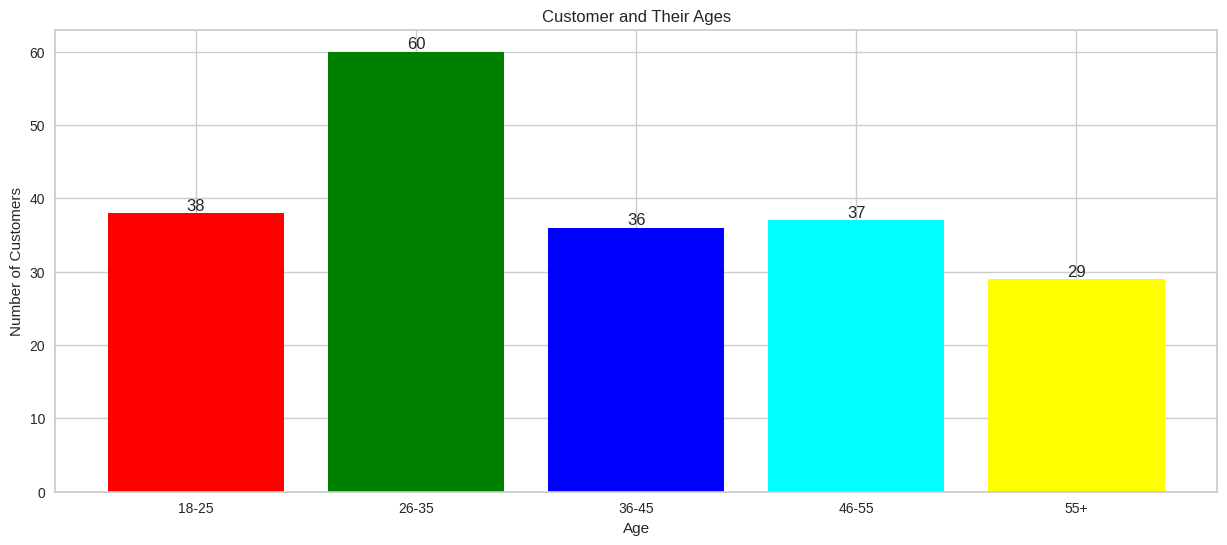

In [10]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]
 
# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]
 
# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
 
plt.show()

Untuk menganalisis distribusi pendapatan tahunan pelanggan, kita mengelompokkan pendapatan ke dalam beberapa kategori dan menghitung jumlah pelanggan pada setiap kategori. Pendapatan tahunan dikelompokkan ke dalam lima rentang.

$0–30,000
$30,001–60,000
$60,001–90,000
$90,001–120,000
$120,001–150,000
Setelah menghitung jumlah pelanggan dalam setiap kategori, data tersebut divisualisasikan melalui bar chart. Grafik ini memperlihatkan jumlah pelanggan dalam setiap rentang pendapatan dengan warna berbeda untuk masing-masing kategori.

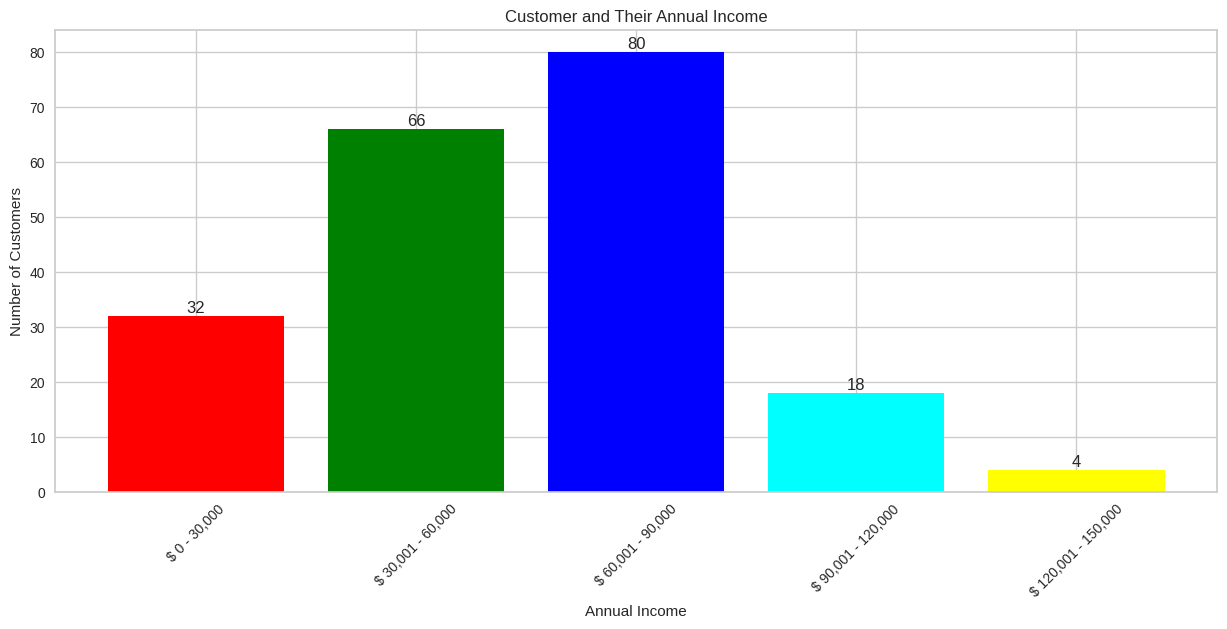

In [11]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
 
# Menyusun data untuk plotting
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
 
# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

Hasil visualisasi menunjukkan distribusi pendapatan tahunan pelanggan sebagai berikut.

$0–30,000: ada 32 pelanggan dalam rentang pendapatan ini.
$30,001–60,000: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 66.
$60,001–90,000: ada 80 pelanggan dalam rentang pendapatan ini dan menjadikannya kategori dengan jumlah pelanggan terbesar.
$90,001–120,000: rentang ini memiliki 18 pelanggan.
$120,001–150,000: kategori ini mencakup 4 pelanggan yang merupakan jumlah paling sedikit di antara semua kategori.
Bar chart ini menunjukkan bahwa pelanggan paling banyak berada dalam rentang pendapatan $60,001–90,000, sedangkan kategori pendapatan tertinggi $120,001–150,000 memiliki jumlah pelanggan yang paling sedikit. Grafik ini memberikan wawasan tentang distribusi pendapatan pelanggan dan dapat membantu dalam merencanakan strategi pemasaran yang lebih efektif.



Data Splitting
Selanjutnya, kita mengambil dua kolom penting dari dataset: Annual Income (k$) dan Spending Score (1-100). Data dari kedua kolom ini disimpan dalam array X untuk analisis lebih lanjut. Setelah itu, kita menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai, yaitu Annual Income (k$) dan Spending Score (1-100). Ini memungkinkan kita untuk melihat serta memeriksa nilai-nilai pendapatan tahunan dan skor pengeluaran pelanggan dengan cara yang lebih terstruktur serta mudah dibaca.

In [12]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values
 
# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Dengan data yang telah disiapkan, kita sekarang siap untuk memasuki tahapan pembangunan model clustering. Pada tahap ini, kita akan menggunakan teknik clustering untuk mengelompokkan pelanggan berdasarkan pendapatan tahunan dan skor pengeluaran mereka. Mari kita lanjutkan ke proses selanjutnya untuk membangun dan menganalisis model clustering.



Elbow Method
Sebelum melanjutkan ke pembangunan model clustering, kita perlu menentukan jumlah cluster yang optimal untuk data kita. Untuk itu, kita akan menggunakan metode elbow method. Metode ini berfungsi seperti "cenayang" yang membantu kita memilih jumlah cluster terbaik dengan melihat perubahan total within-cluster sum of squares (WCSS) saat jumlah cluster bertambah.

Dengan menggunakan elbow method, kita akan menggambar grafik WCSS terhadap jumlah cluster dan mencari "siku" pada grafik tersebut. Titik letak penurunan WCSS mulai melambat, atau sikunya, biasanya menunjukkan jumlah cluster yang optimal. Ini membantu kita menghindari overfitting dengan memilih jumlah cluster yang sesuai dengan struktur data.

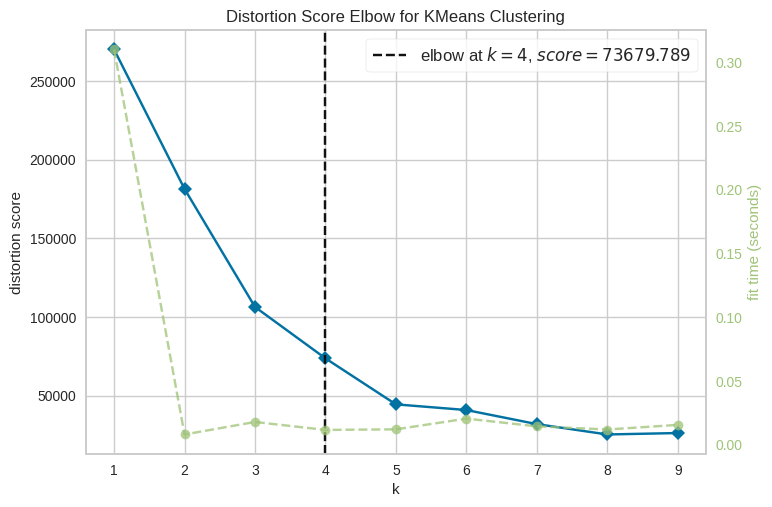

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()
 
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

Hasil analisis metode elbow menunjukkan bahwa jumlah cluster optimal adalah 4 dengan nilai total within-cluster sum of squares (WCSS) sebesar 73,679.789. Ini berarti bahwa membagi data menjadi 4 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster. 



Cluster Modeling (K-Means Clustering)
Great! Dengan jumlah cluster yang sudah ditentukan sebanyak 4, kita dapat melanjutkan dengan membangun model clustering menggunakan KMeans. 

Dalam kode ini, kita melakukan analisis karakteristik cluster setelah melatih model KMeans dengan jumlah cluster yang telah ditetapkan, yaitu 4. Pertama, kita menginisialisasi model KMeans dengan parameter n_clusters=4 dan random_state=0 untuk memastikan hasil yang konsisten. Setelah melatih model dengan data X, kita memperoleh label cluster untuk setiap titik data.

Fungsi analyze_clusters kemudian digunakan untuk menganalisis karakteristik dari setiap cluster. Fungsi ini mengambil data dari masing-masing cluster berdasarkan label yang diberikan oleh model. Untuk setiap cluster, fungsi ini menghitung rata-rata dari dua fitur: pendapatan tahunan (Annual Income) dan skor belanja (Spending Score). Hasil analisis dicetak untuk setiap cluster menunjukkan rata-rata pendapatan tahunan dan skor belanja yang memberikan wawasan tentang profil pelanggan dalam setiap cluster.

In [14]:
from sklearn.cluster import KMeans
 
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
 
# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 4
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Annual Income
        mean_spending = cluster_data[:, 1].mean()  # Rata-rata Spending Score
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Annual Income (k$): {mean_income:.2f}")
        print(f"Rata-rata Spending Score (1-100): {mean_spending:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Annual Income (k$): 48.26
Rata-rata Spending Score (1-100): 56.48

Cluster 2:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score (1-100): 82.13

Cluster 3:
Rata-rata Annual Income (k$): 87.00
Rata-rata Spending Score (1-100): 18.63

Cluster 4:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score (1-100): 20.91


Dalam kode ini, kita melakukan visualisasi hasil clustering yang telah dilakukan dengan model KMeans serta menampilkan posisi centroid dari setiap cluster. Pertama, kita menentukan posisi centroid dengan menggunakan atribut cluster_centers_ dari model KMeans.

Visualisasi dimulai dengan plot scatter untuk menampilkan data pelanggan yang telah dikelompokkan ke dalam cluster dengan warna berbeda pada setiap cluster berdasarkan pemberian label. Centroid dari setiap cluster digambarkan dengan marker 'X' berwarna merah dan ukuran yang lebih besar. Label ditambahkan pada setiap centroid untuk menandai posisinya.

Selain itu, kita menambahkan judul serta label pada sumbu X dan Y untuk memberikan konteks pada plot yang menunjukkan distribusi pendapatan tahunan serta skor belanja pelanggan dalam setiap cluster. Setelah visualisasi, nilai centroid untuk setiap cluster ditampilkan. Ini menunjukkan pendapatan tahunan dan skor belanja rata-rata yang mewakili pusat dari masing-masing cluster.

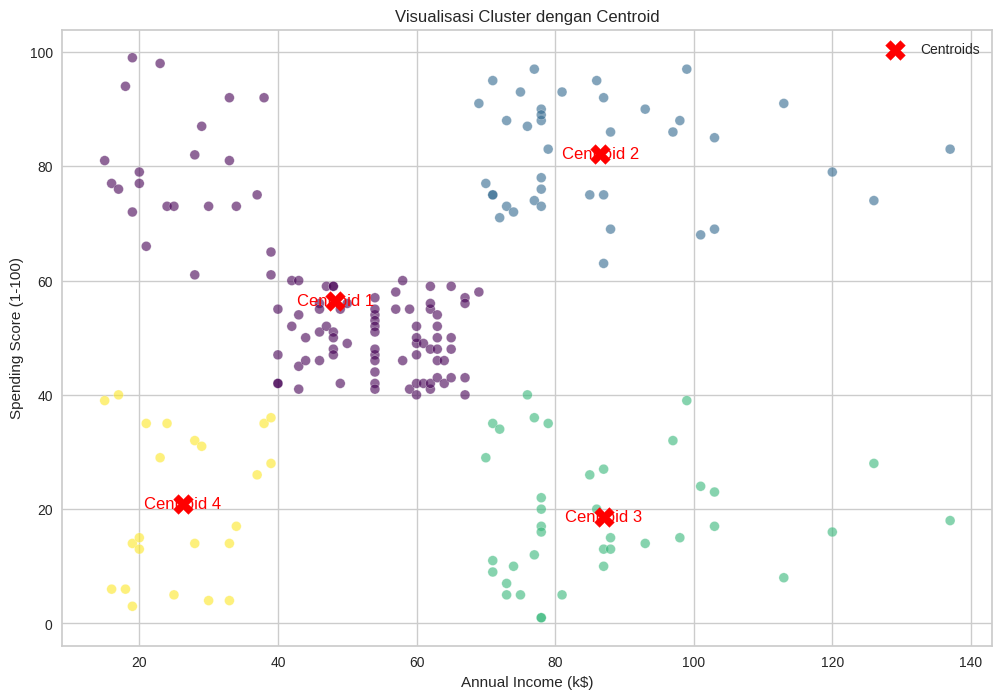

Nilai Centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [15]:
import matplotlib.pyplot as plt
 
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
 
# Visualisasi cluster
plt.figure(figsize=(12, 8))
 
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

Nilai centroid untuk setiap cluster sebagai berikut.

Centroid 1: pendapatan tahunan $48,260 serta skor belanja 56.48 menunjukkan pelanggan dengan pendapatan menengah dan belanja tinggi.
Centroid 2: pendapatan tahunan $86,540 serta skor belanja 82.13 menggambarkan pelanggan dengan pendapatan tinggi dan belanja intensif.
Centroid 3: pendapatan tahunan $87,000 serta skor belanja 18.63 menunjukkan pelanggan berpendapatan tinggi dan berbelanja sedikit.
Centroid 4: pendapatan tahunan $26,300 serta skor belanja 20.91 menunjukkan pelanggan dengan pendapatan dan belanja rendah.
Ini memberikan gambaran tentang karakteristik pusat dari masing-masing cluster pelanggan dan membantu dalam merancang strategi pemasaran yang lebih efektif.